The folder **beauty** contains data from Hamermesh and Parker (2005) on student evaluations of instructors' beauty and teaching quality for several courses at the Universtiy of Texas. The taeching evaluations were conducted at the end of the semester, and the beauty judgements were made later, by six sutdents who had not attended the classes and were not aware of the course evaluations.

a. Run a regression using beauty (the variable **btystdave**) to predict course evalutations (**courseevaluation**), controlling for various other inputs. Display the fitted model graphically, and explaining the meaning of each of the coefficients, along with the residual standard deviation. Plot the residuals verses fitted values.

b. Fit some other models, including beauty and also other input variables. Consider at least one model with interactionos. For each model, state what the *predictors* are, and what the *inputs* are (see Section 2.1), and explain the meaning of each of the coefficients.

See also Felton, Mitchell, and Stinson (2003) for more on this topic

In [254]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
from scipy import stats

In [143]:
# Part A
evaluation_data = pd.read_csv('beauty/evals.csv') # Load Data

array(['not formal', 'formal'], dtype=object)

In [204]:
ordered_rank = ['teaching', 'tenure track', 'tenured']
ordered_cls_level = ['lower','upper']
ordered_cls_credit = ['one credit', 'multi credit']

evaluation_data_formatted = evaluation_data.copy()
evaluation_data_formatted['rank'] = evaluation_data['rank'].astype('category', ordered=True, categories=ordered_rank).cat.codes
evaluation_data_formatted['ethnicity'] = evaluation_data['ethnicity'].astype('category').cat.codes
evaluation_data_formatted['gender'] = evaluation_data['gender'].astype('category').cat.codes
evaluation_data_formatted['language'] = evaluation_data['language'].astype('category').cat.codes
evaluation_data_formatted['cls_level'] = evaluation_data['cls_level'].astype('category', ordered=True, categories=ordered_cls_level).cat.codes
evaluation_data_formatted['cls_profs'] = evaluation_data['cls_profs'].astype('category').cat.codes
evaluation_data_formatted['cls_credits'] = evaluation_data['cls_credits'].astype('category', ordered=True, categories=ordered_cls_credit).cat.codes
evaluation_data_formatted['pic_outfit'] = evaluation_data['pic_outfit'].astype('category').cat.codes
evaluation_data_formatted['pic_color'] = evaluation_data['pic_color'].astype('category').cat.codes


In [205]:
evaluation_data_formatted.columns

Index(['score', 'rank', 'ethnicity', 'gender', 'language', 'age',
       'cls_perc_eval', 'cls_did_eval', 'cls_students', 'cls_level',
       'cls_profs', 'cls_credits', 'bty_f1lower', 'bty_f1upper', 'bty_f2upper',
       'bty_m1lower', 'bty_m1upper', 'bty_m2upper', 'bty_avg', 'pic_outfit',
       'pic_color'],
      dtype='object')

In [206]:
evaluation_data_formatted = evaluation_data_formatted[['score', 'rank', 'ethnicity', 'gender', 'language', 'age',
       'cls_perc_eval', 'cls_did_eval', 'cls_students', 'cls_level',
       'cls_profs', 'cls_credits','bty_avg', 'pic_outfit',
       'pic_color']].copy()

Before running the regression, it helps to look at distribution of the evaluation and beauty scores:

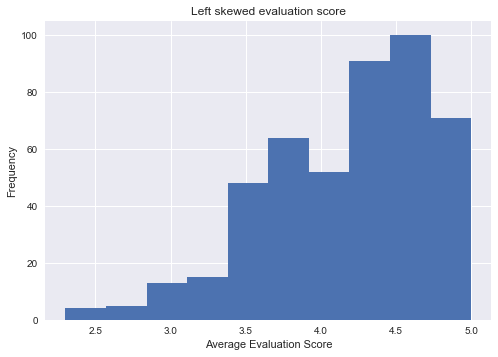

In [207]:
plt.hist(evaluation_data_formatted['score'], bins=10)
plt.xlabel('Average Evaluation Score')
plt.ylabel('Frequency')
plt.title('Left skewed evaluation score')
plt.show()

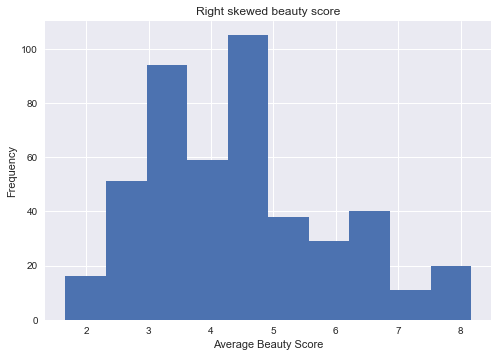

In [208]:
plt.hist(evaluation_data_formatted['bty_avg'], bins=10)
plt.xlabel('Average Beauty Score')
plt.ylabel('Frequency')
plt.title('Right skewed beauty score')
plt.show()

In [209]:
x_beauty_features = evaluation_data_formatted.drop('score', axis=1).as_matrix()
#x_beauty_features = x_beauty_features[:, np.newaxis]

y_course_evaluation = evaluation_data_formatted['score'].as_matrix()

regr = LinearRegression()
regr.fit(x_beauty_features, y_course_evaluation)
params = np.append(regr.intercept_, regr.coef_)
y_course_evaluation_predicted = regr.predict(x_beauty_features)

In [210]:
new_x_beauty_features = pd.DataFrame({'Constant':np.ones(len(x_beauty_features))}).join(pd.DataFrame(x_beauty_features))
MSE = (sum((y_course_evaluation-y_course_evaluation_predicted)**2))/(len(new_x_beauty_features)-len(new_x_beauty_features.columns))

In [211]:
var_b = MSE*(np.linalg.inv(np.dot(new_x_beauty_features.T,new_x_beauty_features)).diagonal())
sd_b = np.sqrt(var_b)
ts_b = params/sd_b

p_values = [2*(1-stats.t.cdf(np.abs(i),(len(new_x_beauty_features)-1))) for i in ts_b]

In [212]:
sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)
p_values = np.round(p_values,3)
params = np.round(params,4)

In [213]:
summary_df = pd.DataFrame()
summary_df["Features"],summary_df["Coefficients"],summary_df["Standard Errors"],summary_df["t values"],summary_df["Probabilites"] = [["constant"]+full_feature_list,params,sd_b,ts_b,p_values]
print(summary_df)

         Features  Coefficients  Standard Errors  t values  Probabilites
0        constant        4.5883            0.297    15.459         0.000
1            rank       -0.0428            0.033    -1.304         0.193
2       ethnicity        0.1255            0.079     1.596         0.111
3          gender        0.2211            0.052     4.258         0.000
4        language       -0.2682            0.109    -2.453         0.015
5             age       -0.0068            0.003    -2.548         0.011
6   cls_perc_eval        0.0036            0.002     1.732         0.084
7    cls_did_eval        0.0039            0.003     1.257         0.209
8    cls_students       -0.0019            0.002    -0.991         0.322
9       cls_level        0.0459            0.058     0.785         0.433
10      cls_profs       -0.0090            0.052    -0.172         0.863
11    cls_credits       -0.5007            0.116    -4.316         0.000
12        bty_avg        0.0389            0.018   

The following features have a significant effect on the course evaluation, ranked from the positive to negative:

1. gender (0.2211)
2. average beauty rating (0.0389)
3. age (-0.0068)
4. color picture (-0.2236)
5. language (-0.2682)
6. class credits(-0.5007)

The gender coefficient suggests, all else held equal, that a change in the gender of the professor has an average difference of 0.2211 in the evaluation of the course. A change in the class credits (from single to multi) has a -0.5007 average difference in the evaluation of the course.

## Evaluation ~ Beauty

In [246]:
overall_df = evaluation_data_formatted.copy()
female_df = evaluation_data_formatted[evaluation_data_formatted['gender']==0]
male_df = evaluation_data_formatted[evaluation_data_formatted['gender']==1]

x_beauty_gender = overall_df[['gender','bty_avg']].as_matrix()
x_beauty_female = female_df[['bty_avg']].as_matrix()
x_beauty_male = male_df[['bty_avg']].as_matrix()

y_course_evaluation_gender = overall_df['score'].as_matrix()
y_course_evaluation_female = female_df['score'].as_matrix()
y_course_evaluation_male = male_df['score'].as_matrix()

regr_model_gender = LinearRegression()
regr_model_female = LinearRegression()
regr_model_male = LinearRegression()

regr_model_gender.fit(x_beauty_gender, y_course_evaluation_gender)
regr_model_female.fit(x_beauty_female, y_course_evaluation_female)
regr_model_male.fit(x_beauty_male, y_course_evaluation_male)

y_course_evaluation_predicted_model_gender = regr_model_gender.predict(x_beauty_gender)
y_course_evaluation_predicted_model_female = regr_model_female.predict(x_beauty_female)
y_course_evaluation_predicted_model_male = regr_model_male.predict(x_beauty_male)

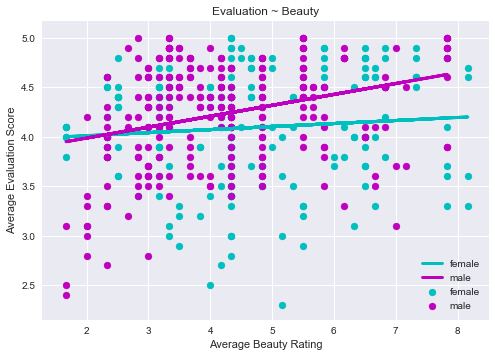

In [249]:
plt.scatter(female_df['bty_avg'], female_df['score'], c='c', label='female')
plt.scatter(male_df['bty_avg'], male_df['score'], c='m', label='male')
plt.plot(
    female_df['bty_avg'],
    y_course_evaluation_predicted_model_female,
    color='c',
    label='female',
    linewidth=3)
plt.plot(
    male_df['bty_avg'],
    y_course_evaluation_predicted_model_male,
    color='m',
    label='male',
    linewidth=3)
plt.ylabel('Average Evaluation Score')
plt.xlabel('Average Beauty Rating')
plt.title('Evaluation ~ Beauty')
plt.legend()
plt.show()

In [240]:
print("Female estimated intercept: {i}\n".format(i=regr_model_female.intercept_))
print("Female estimated coefficient: {i}\n".format(i=regr_model_female.coef_))
print("Male estimated intercept: {i}\n".format(i=regr_model_male.intercept_))
print("Male estimated coefficient: {i}\n".format(i=regr_model_male.coef_))

Female estimated intercept: 3.950059839237781

Female estimated coefficient: [ 0.03064259]

Male estimated intercept: 3.766550809406275

Male estimated coefficient: [ 0.11026114]



It seems that course taught by men see a greater "return" from an increase in their beauty rating than women do (they both start in approximately the same place). 

In [250]:
overall_residuals = y_course_evaluation_gender - y_course_evaluation_predicted_model_gender
female_residuals = y_course_evaluation_female - y_course_evaluation_predicted_model_female
male_residuals = y_course_evaluation_male - y_course_evaluation_predicted_model_male
resid_std_gender = np.std(overall_residuals)
resid_std_female = np.std(female_residuals)
resid_std_male = np.std(male_residuals)
print("Residual standard deviation (overall): {r}".format(r=resid_std_gender))
print("Residual standard deviation (female): {r}".format(r=resid_std_female))
print("Residual standard deviation (male): {r}".format(r=resid_std_male))

Residual standard deviation (overall): 0.5269721884911932
Residual standard deviation (female): 0.5603082979223238
Residual standard deviation (male): 0.4950993965587394


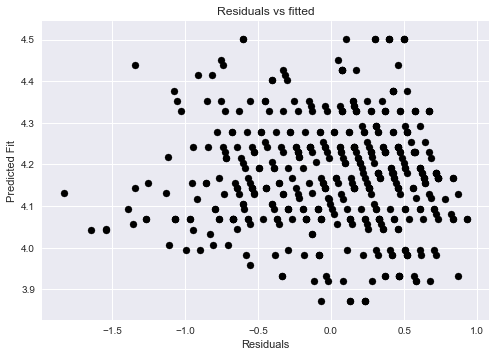

In [253]:
plt.scatter(overall_residuals, y_course_evaluation_predicted_model_gender, color='black')
plt.title("Residuals vs fitted")
plt.xlabel("Residuals")
plt.ylabel("Predicted Fit")
plt.show()

## Evaluation ~ Beauty + Class Credits + Beauty*Class Credits

In [255]:
poly = PolynomialFeatures(degree=2, interaction_only=False)
x_beauty_cls_credits = evaluation_data_formatted[['cls_credits','bty_avg']].as_matrix()

x_beauty_cls_credits_interaction = poly.fit_transform(x_beauty_cls_credits)
#x_mother_age_work_highschool_interaction = np.hstack((x_beauty_cls_credits_interaction))

y_course_evaluation = evaluation_data_formatted['score'].as_matrix()

regr_model_2 = LinearRegression()
regr_model_2.fit(x_beauty_cls_credits_interaction, y_course_evaluation)
y_course_evaluation_predicted_model_2 = regr_model_2.predict(x_beauty_cls_credits_interaction)

In [259]:
features_dataframe = pd.DataFrame(x_beauty_cls_credits_interaction, columns=['1','cls_credits','bty_avg','cls_credits^2','cls_credits*bty_avg','bty_avg^2'])
print("Estimated intercept: {i}\n".format(i=regr_model_2.intercept_))
print("Number of coefficients: {i}\n".format(i=len(regr_model_2.coef_)))
pd.DataFrame(list(zip(features_dataframe.columns, regr_model_2.coef_)), columns=['Features','Coefficient'])

Estimated intercept: 4.5911920980542975

Number of coefficients: 6



,Features,Coefficient
0,1,0.000000
1,cls_credits,-0.567373
2,bty_avg,0.078883
3,cls_credits^2,-0.567373
4,cls_credits*bty_avg,0.159977
5,bty_avg^2,-0.016778


In [261]:
mse = np.mean((y_course_evaluation_predicted_model_2-y_course_evaluation)** 2)
print("Mean squared error: {m}".format(m=mse))
print("Variance score: {v}".format(v=regr_model_2.score(x_beauty_cls_credits_interaction, y_course_evaluation)))

Mean squared error: 0.26662389800571223
Variance score: 0.09664878813935307


When we use the class credits and average beauty (with interaction terms) to predict the course evaluation, we see that the a change from "single" to "multiple" credits reduces the course evaluation by 0.5. The square of the credits isn't very meaningful since it's 0 and 1 (whose square is 0 and 1 already). The beauty score-squared shows that the extreme scores have a negative impact on the class evaluation.